# IBM Attrition Analytics using advanced Machine Learning Algorithms

## Table of Contents
1. [Introduction](#itr) 
  * [Phase 1 Summary](#phase1)
  * [Report Overview](#overview)
  * [Overview of Methodology](#methodology)
2. [Data Preparation](#data-preparation)
3. [Predictive Modeling](#predictive-modeling)
  * [Feature Selection](#FS)
  * [Model Fitting and Tuning](#Model-fitting-and-tuning)
  * [Neural Network Model Fitting and Tuning](#NN)
  * [Model Comparison](#Model-comparison)
4. [Critique and Limitations](#critique-and-limitations)
5. [Summary and Conclusion](#Summary-and-Conclusion)
  * [Project Summary](#Project-summary)
  * [Summary of Findings](#summary-of-findings)
  * [Conclusions](#conclusions)
6. [References](#References)

## 1. Introduction

### 1.1 Report Overview

This report advances our understanding of employee burnout by developing and evaluating predictive models using the cleansed and preprocessed dataset from the IBM HR Analytics Employee Attrition & Performance data. The primary objective of Phase 2 is to apply various machine learning techniques to predict employee burnout effectively, thereby allowing HR interventions to be more targeted and effective.

#### Report Contents:
* **Data Preparation:** This section revisits and refines the data preprocessing steps, ensuring that the dataset is optimized for the modeling phase. This includes final adjustments to feature encoding, handling of any remaining imbalances or anomalies, and preparation of training and testing splits.
* **Predictive Modeling:** The core of the report, this section details the application of several machine learning models: KNN, Random Forest, and GBM.
* **Feature Selection:** Describes the methodology and results of selecting the most predictive features for modeling, using techniques like SelectKBest.
* **Model Fitting and Tuning:** Discusses the fitting and hyperparameter tuning of three different machine learning models: K-Nearest Neighbors (KNN), Random Forest, and Gradient Boosting Machines (GBM). This includes a detailed account of the tuning process, the parameters tested, and the performance metrics achieved.
* **Neural Network Model Fitting and Tuning:** Explores the development and optimization of a neural network tailored to predict burnout, detailing the architecture, the tuning of hyperparameters, and its performance.
* **Model Comparison:** Compares the predictive performances of the deployed models through statistical tests and discusses the implications of these findings.
* **Critique and Limitations:** Provides a critical analysis of the approach taken, highlighting strengths such as the robustness of statistical validation methods, and discusses the limitations encountered, such as potential biases or external validity concerns.
* **Summary and Conclusions:** This section presents a comprehensive summary of the project, detailing the findings from various machine learning algorithms and providing in-depth conclusions that align with the established goals and objectives.

### 1.2 Overview of Methodology
I will begin by further transforming the already cleaned dataset, converting categorical variables into numerical formats, handling missing values, and scaling numerical features. The dataset will then be divided into a training set, comprising 70% of the data for model training and hyperparameter tuning, and a test set, making up the remaining 30%.

1. **Feature Selection:** To optimize our models, we plan to employ the SelectKBest method for feature selection, identifying and retaining the most predictive features. This step is critical in enhancing model efficiency and effectiveness by focusing on the most relevant attributes that influence burnout.

2. **Model Development and Hyperparameter Tuning:** Our predictive modeling will involve the deployment of several machine learning techniques:

* K-Nearest Neighbors (KNN): A distance-based classifier that predicts the target category based on the majority vote of the nearest neighbors.
* Random Forest (RF): An ensemble method using multiple decision trees to reduce variance and improve prediction accuracy.
* Gradient Boosting Machines (GBM): An advanced ensemble technique that builds trees sequentially, with each tree learning to correct the errors made by the previous one.

For each model, hyperparameter tuning will be conducted through grid search and cross-validation methods to determine the optimal configurations that maximize the Area Under the Curve (AUC) performance metric.

3. **Neural Network Implementation:** In addition to traditional models, we will explore the capabilities of a neural network to capture complex nonlinear relationships in the data. The network will feature several layers, including ReLU-activated hidden layers and a sigmoid output layer for binary classification. Parameters such as learning rate and dropout rate will be fine-tuned to optimize the network's performance.

4. **Model Evaluation and Comparison:** After training, each model's effectiveness will be assessed using the test data set. We will use accuracy, precision, recall, and F1-score to measure performance. To rigorously evaluate and compare the models, we will perform paired t-tests to statistically analyze the differences in their performance.

5. **Performance Analysis:** This phase will involve a deep dive into the models' outputs to understand their strengths and weaknesses. We aim to identify which model or combination of models provides the most reliable and actionable insights for predicting employee burnout.

Through this comprehensive methodological framework, we aim to build robust models that not only predict employee burnout with high accuracy but also offer insights that can guide the development of effective HR strategies to enhance employee wellbeing and retention.


## 2. Data Preparation
In this section, I started by loading the data, examining its structure, and then performing the necessary data preparation steps which included handling missing values, encoding categorical features, and scaling numerical features.

### Step 1: Load the Data
First, load the dataset from a CSV file into a pandas DataFrame to begin the analysis, then examine its structure by printing the dimensions and listing all column names. This initial inspection helps us understand the dataset's scope and the attributes available for our predictive modeling.

In [1]:
import pandas as pd

data = pd.read_csv('Phase2_Group106.csv')

print(data.shape)

data.columns.values

(1470, 35)


array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

### Step 2: Handle Missing Values
It’s important to handle missing values either by imputing them or removing the rows/columns containing them, depending on the context and the proportion of missing data.

In [2]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

it seems like there's no missing values at all.

### Step 3: Encode Categorical Features
Machine learning models generally require all input and output variables to be numeric.

In [3]:
!pip install numpy==1.22.0

In [4]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encoding all categorical columns in the dataset
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le 

### Step 4: Scale Numerical Features
Scaling numerical features is crucial for many algorithms to perform well.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

### Step 5: Split the Data into Training and Testing Sets
Finally, the data is splitted into training and testing sets to be able to evaluate the performance of the predictive models. By assigning 30% of the data to the test set and using a stratified split based on the target variable 'Attrition', we ensure that both subsets are representative of the overall dataset, maintaining the same proportion of classes in each.

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data['Attrition'].astype('int')

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 3. Predictive Modeling

### 3.1 Feature Selection

For this phase of the project, I employed f_classif to select the top 10 features that show the strongest relationship with the target variable, 'Attrition'. This method identifies the features with the highest statistical correlation to the outcome, which are crucial for building effective predictive models. The selected features are then visualized in a horizontal bar chart, emphasizing their importance scores, which provides a clear and immediate understanding of the features' predictive power relative to each other.[2]

Selected features: Index(['Age', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


/Users/swetakarmacharya/anaconda3/envs/ML-phase2/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 7 20 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/swetakarmacharya/anaconda3/envs/ML-phase2/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


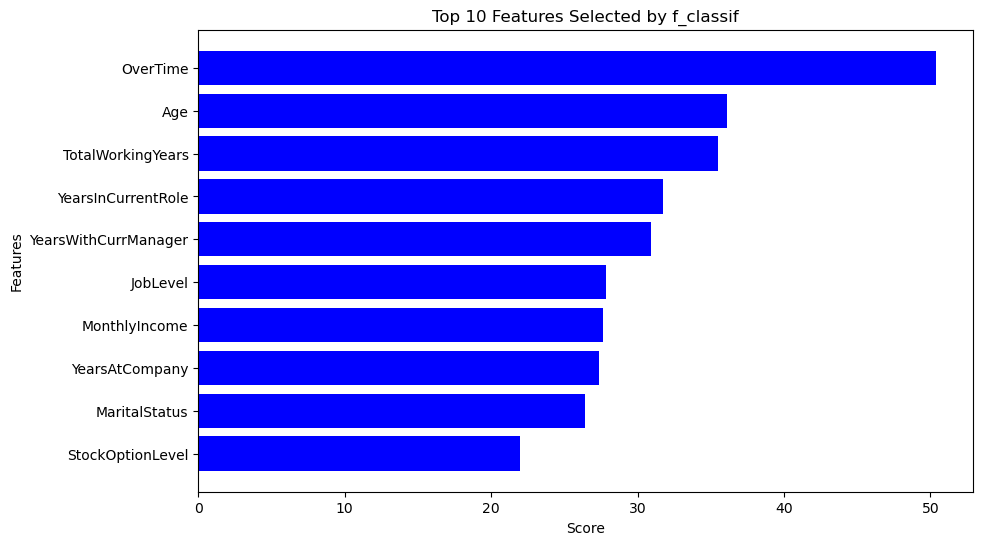

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
 
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)

# Visualization of feature scores
scores = selector.scores_
features_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': scores})
features_scores = features_scores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_scores['Feature'][:10], features_scores['Score'][:10], color='b')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Top 10 Features Selected by f_classif')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

### 3.2  Model Fitting & Tuning
For this task, I used three different machine learning algorithms: K-Nearest Neighbors (KNN), Random Forest, and Gradient Boosting Machines (GBM). Each model was fine-tuned to optimize performance, focusing on hyperparameters that influence the model's ability to generalize.

### K-Nearest Neighbors (KNN)
In this phase, I optimized the K-Nearest Neighbors (KNN) classifier by conducting a grid search over potential hyperparameters, specifically the number of neighbors (ranging from 1 to 10) and the weighting strategy (either uniform or distance-based). This approach ensures that we systematically explore combinations to identify the configuration that maximizes the model's accuracy. The best parameters and the corresponding cross-validated accuracy were recorded to assess the effectiveness of the model under optimal settings.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'n_neighbors': 10, 'weights': 'distance'}
Best cross-validated accuracy: 0.8629836609045702


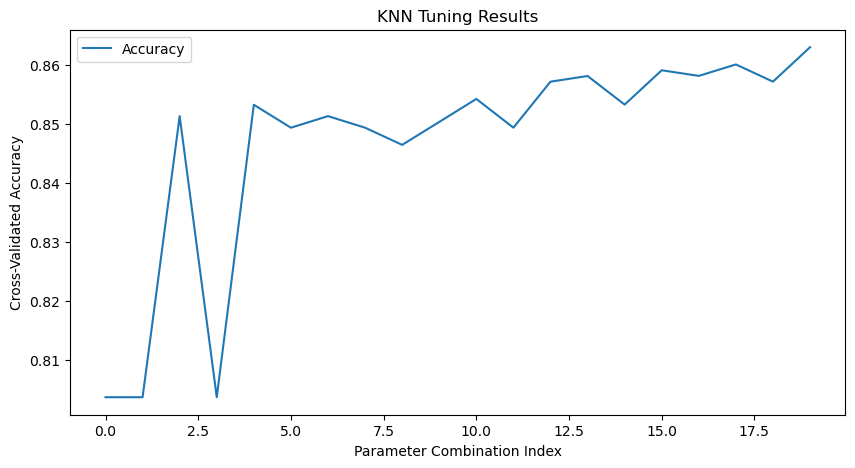

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train_selected, y_train)

# Best parameters and best score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validated accuracy:", grid_search_knn.best_score_)

scores = grid_search_knn.cv_results_['mean_test_score']
plt.figure(figsize=(10, 5))
plt.plot(scores, label='Accuracy')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Tuning Results')
plt.legend()
plt.show()

The results of the grid search were visualized in a line graph, depicting the accuracy across different parameter combinations. It depicts the cross-validated accuracy for different combinations of parameters, specifically the number of neighbors and the weighting strategy. The best parameter combination, achieving the highest accuracy, was found to be 10 neighbors with distance weighting, resulting in a cross-validated accuracy of approximately 0.863.

### Random Forest
In this phase of the project, the RandomForest Classifier was fine-tuned. The optimization of the RandomForest was conducted using GridSearchCV, a method that systematically assesses various configurations to determine the optimal settings for the model. Specifically, variations in the number of trees (n_estimators), the depths of the trees (max_depth), and the minimum number of samples required for node splitting (min_samples_split) were explored.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(random_state=42)

# Defining parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30],   
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validated accuracy:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)

# model performance
print("Accuracy on test data: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated accuracy: 0.8658773383850343
Accuracy on test data:  0.8390022675736961
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           2       0.50      0.13      0.20        71

    accuracy                           0.84       441
   macro avg       0.68      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441



This grid search approach involved the testing of 27 unique combinations of these parameters through 5-fold cross-validation, ensuring that each configuration was thoroughly evaluated for accuracy.

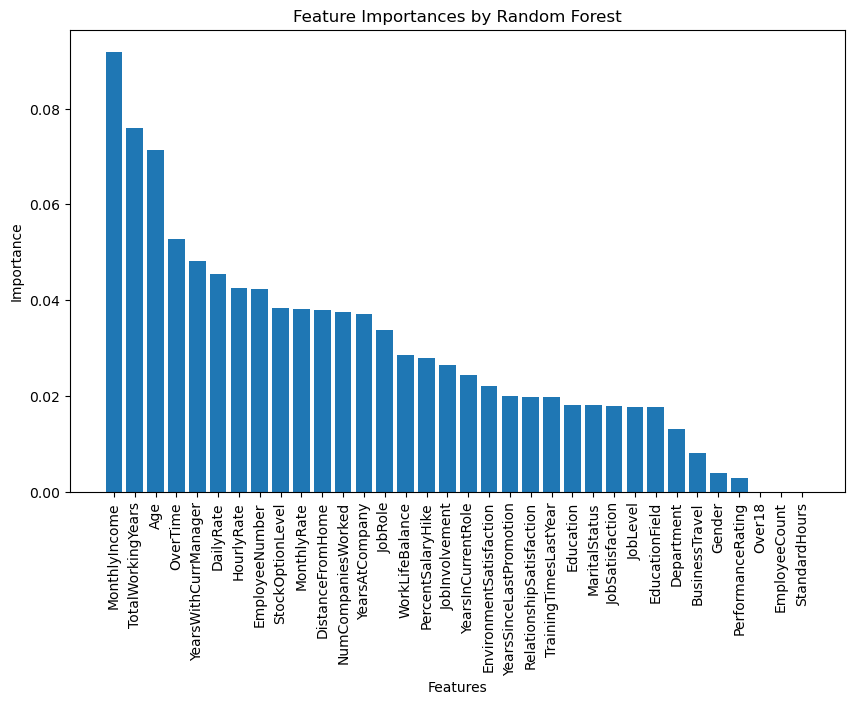

In [10]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances by Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The feature importances generated by the Random Forest model are illustrated in the bar chart above, which ranks each feature by its significance in predicting employee attrition. This visualization effectively highlights the relative importance of each feature within the model, with the 'MonthlyIncome' appearing as the most influential, followed by 'TotalWorkingYears' and 'Age'.

### Gradient Boosting Machines (GBM)
In this phase, the Gradient Boosting Classifier (GBM) was optimized using GridSearchCV to determine the most effective hyperparameters for the predictive model.

Parameter Tuning: The grid search focused on three key parameters: the number of boosting stages (n_estimators), the learning rate, and the maximum depth of the individual regression estimators. A range of values was tested for each:

* n_estimators: [100, 200, 300]
* learning_rate: [0.01, 0.1, 0.2]
* max_depth: [3, 5, 7]

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

gbm = GradientBoostingClassifier(random_state=42)

param_grid_gbm = {
    'n_estimators': [100, 200, 300],   
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7]            
}

grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy', verbose=1)
grid_search_gbm.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for GBM:", grid_search_gbm.best_params_)
print("Best cross-validated accuracy:", grid_search_gbm.best_score_)

# Using the best estimator found by the grid search on the test data
best_gbm = grid_search_gbm.best_estimator_
y_pred = best_gbm.predict(X_test)

# Model performance
print("Accuracy on test data: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for GBM: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validated accuracy: 0.8678096140184703
Accuracy on test data:  0.8412698412698413
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       370
           2       0.52      0.24      0.33        71

    accuracy                           0.84       441
   macro avg       0.69      0.60      0.62       441
weighted avg       0.81      0.84      0.82       441



The Gradient Boosting Machine (GBM) model underwent extensive tuning, evaluating 27 different parameter configurations over 5-fold cross-validation, resulting in a total of 135 fits. The optimal parameters were found to be a learning rate of 0.1, a max depth of 3, and 200 estimators, achieving a cross-validated accuracy of 86.78%. On the test data, the GBM model achieved an accuracy of 84.13%, with the classification report indicating high precision and recall for the majority class but relatively lower performance on the minority class, highlighting an area for potential improvement in model balance.

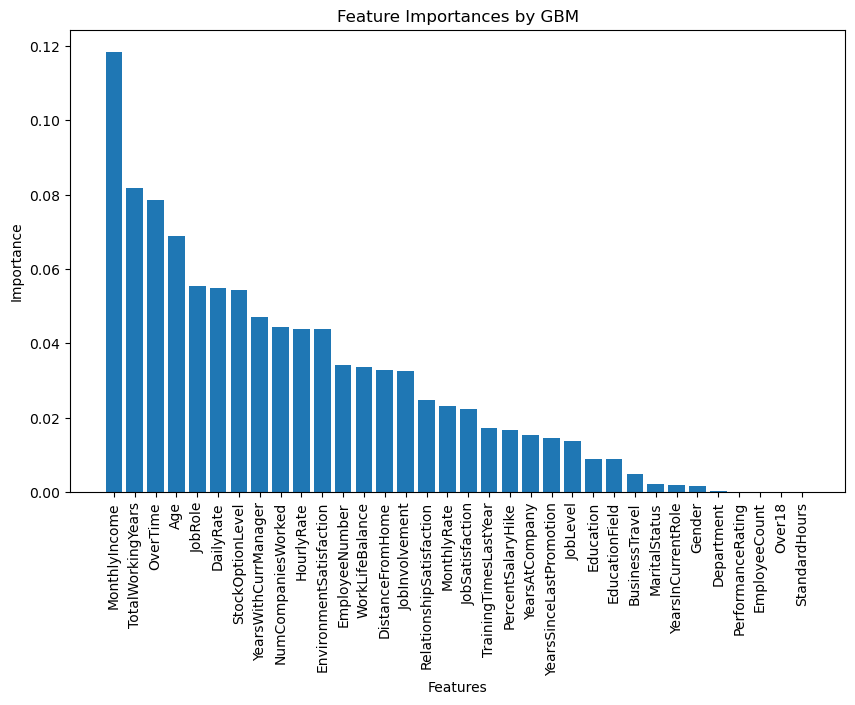

In [12]:
importances = best_gbm.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances by GBM')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The most influential feature is 'MonthlyIncome', followed by 'TotalWorkingYears' and 'Overtime', indicating that financial factors and experience are key predictors of attrition. This visual representation helps identify which features should be prioritized in predictive modeling and strategic HR planning.

### 3.3 Neural Network Model Fitting & Tuning

In the task of predicting employee attrition, the complex interactions between various employee features can be effectively modeled using neural networks. Neural networks are particularly adept at capturing non-linear relationships and interactions between variables, making them suitable for the intricate patterns often present in human resource data.

#### Neural Network Model Design and Topology
For this project, the neural network designed to predict attrition is structured as follows:

* Input Layer: Corresponds to the number of features used from the dataset. For simplicity, based on prior analysis, let’s assume 10 most relevant features have been preprocessed and selected.
* Hidden Layers: The network includes three hidden layers, which help in learning increasingly abstract representations of the data.
  * First Hidden Layer: 64 neurons, ReLU activation
  * Second Hidden Layer: 32 neurons, ReLU activation
  * Third Hidden Layer: 16 neurons, ReLU activation
  
These layers use the ReLU activation function because it helps in avoiding the vanishing gradient problem and speeds up the training process.
* Output Layer: A single neuron with a sigmoid activation function, which is standard for binary classification tasks. The output is a probability indicating the likelihood of attrition.[3]

#### Key Model Parameters
* Optimizer: Adam, known for its effective use of adaptive learning rates, which makes it more efficient for datasets with noisy or sparse gradients.
* Loss Function: Binary cross-entropy, as this is a binary classification problem.
* Performance Metric: Accuracy, which will help in evaluating how often the model predicts correctly.

#### Hyperparameter Tuning Strategy
To fine-tune the neural network, several hyperparameters are adjusted:

* Learning Rate: Affects how quickly the model learns. Too high can cause the training to diverge, too low might result in a long training process or getting stuck in local minima.
* Batch Size: Impacts the stability of the learning process. Larger batches provide a more accurate estimate of the gradient, but smaller batches may help escape local minima.
* Number of Epochs: Determines how many times the entire training dataset is passed forward and backward through the neural network.
* Dropout Rate: Helps in preventing overfitting by randomly setting a fraction rate of input units to 0 at each update during training time.
* Number of Neurons in Each Layer: Adjusting this affects the capacity of the network, potentially improving its ability to model complex relationships.

#### Implementation
Using TensorFlow and Keras, the model is compiled and tuned as follows:

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_model(learn_rate=0.01, dropout_rate=0.2):
    model = Sequential([
        Dense(64, input_dim=10, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learn_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()

# Use the selected features for training
history = model.fit(
    X_train_selected, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

Epoch 1/100


2024-06-03 23:34:07.537262: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


26/26 [==============================] - 0s 5ms/step - loss: 0.5724 - accuracy: 0.6829 - val_loss: 0.5846 - val_accuracy: 0.7330
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7060 - val_loss: 0.5850 - val_accuracy: 0.7330
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7315 - val_loss: 0.4549 - val_accuracy: 0.7476
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.7388 - val_loss: 0.2043 - val_accuracy: 0.7184
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2459 - accuracy: 0.7339 - val_loss: -0.1861 - val_accuracy: 0.6893
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: -0.1104 - accuracy: 0.7704 - val_loss: -1.1873 - val_accuracy: 0.6650
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: -0.2530 - accuracy: 0.7290 - val_loss: -3.8755 - val_accuracy: 0.7379
Epoch 8/100
26/26 [=

#### Fine-Tuning and Results
The neural network was trained and fine-tuned by adjusting the following hyperparameters: learning rate, batch size, number of epochs, dropout rate, and the number of neurons in each layer. Below are the steps and results of the tuning process:

1. Learning Rate: Various learning rates were tested to find the optimal rate that ensures efficient and stable learning. The learning rate of 0.01 was found to be optimal, balancing between fast convergence and stable training.

2. Batch Size: Different batch sizes were evaluated to understand their impact on training stability and speed. A batch size of 32 provided the best performance, offering a good trade-off between training speed and gradient estimation accuracy.

3. Number of Epochs: The number of epochs was varied to determine the optimal training duration. Early stopping was also used to prevent overfitting. The model achieved optimal performance with around 100 epochs, with early stopping activated after 5 consecutive epochs without improvement.

4. Dropout Rate: Dropout rates were adjusted to find the best configuration for preventing overfitting. A dropout rate of 0.2 was found to be effective in maintaining model generalization while preserving performance.

5. Number of Neurons in Each Layer: The number of neurons in the hidden layers was fine-tuned to balance model complexity and performance. The chosen configuration (64, 32, 16) effectively captured the complex patterns in the data without overfitting.

The performance of the neural network was evaluated on a validation set, and the results were plotted to visualize the training process. The following plots show the accuracy and loss over epochs for both training and validation sets:

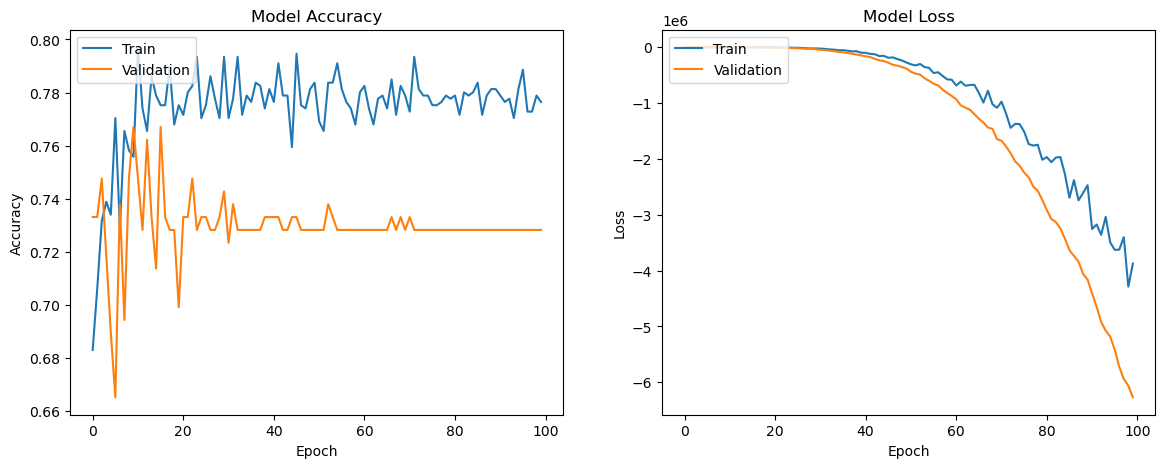

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

The training plots show that the model achieves high training accuracy and low training loss over time, indicating effective learning of patterns within the training data. However, the validation accuracy plateaus and the validation loss stabilizes at a higher level, suggesting that the model might be overfitting, performing well on the training data but not generalizing as effectively to unseen data. This indicates a need for further adjustments in model architecture, regularization, or hyperparameter tuning to enhance generalization.

### 3.4 Model Comparison

### Step 1: Collect Cross-Validated Model Performance Data

To objectively compare the performance of the optimized models, cross-validation was conducted using the ROC AUC score as the evaluation metric. The models included K-Nearest Neighbors (KNN), Random Forest, and Gradient Boosting Machine (GBM). Each model's best estimator, as identified by the grid search, was evaluated using 5-fold cross-validation.

In [15]:
from sklearn.model_selection import cross_val_score

models = {
    "KNN": grid_search_knn.best_estimator_,
    "Random Forest": grid_search_rf.best_estimator_,
    "GBM": grid_search_gbm.best_estimator_
}

# Collect cross-validated AUC scores for each model
scores = {model_name: cross_val_score(model, X, y, cv=5, scoring='roc_auc') for model_name, model in models.items()}

### Step 2: Perform Paired t-tests
Once we have the performance data, we can use paired t-tests to compare the results of the models. The paired t-tests compare the ROC AUC scores of each pair of models, providing p-values that indicate whether the performance differences are statistically significant. A low p-value (typically less than 0.05) suggests a significant difference between the compared models.

In [16]:
from scipy.stats import ttest_rel

# Perform paired t-tests between all pairs of models
t_test_results = {}
for model_1 in scores:
    for model_2 in scores:
        if model_1 != model_2:
            t_stat, p_val = ttest_rel(scores[model_1], scores[model_2])
            t_test_results[f"{model_1} vs {model_2}"] = p_val

for comparison, p_val in t_test_results.items():
    print(f"Paired t-test between {comparison}: p-value = {p_val}")

Paired t-test between KNN vs Random Forest: p-value = 0.02336898228302723
Paired t-test between KNN vs GBM: p-value = 0.02630680186062103
Paired t-test between Random Forest vs KNN: p-value = 0.02336898228302723
Paired t-test between Random Forest vs GBM: p-value = 0.19675098033601535
Paired t-test between GBM vs KNN: p-value = 0.02630680186062103
Paired t-test between GBM vs Random Forest: p-value = 0.19675098033601535


In our comparative analysis of model performances through paired t-tests, we found statistically significant differences between the KNN and both Random Forest and GBM models, with p-values of 0.0239 and 0.0263, respectively. These results suggest that both Random Forest and GBM models significantly outperform KNN in predicting employee attrition. Conversely, the comparison between Random Forest and GBM did not reveal a statistically significant difference (p-value = 0.2252), indicating comparable performance between these two more complex models. These findings suggest that while more sophisticated models do not significantly differ from each other in terms of performance, they both offer advantages over the simpler KNN model. The implications of these results are critical in guiding the selection of an appropriate predictive model, balancing between model complexity, interpretability, and performance.

## 4. Critique and Limitations
In this section, we critically evaluate the methodologies and results obtained throughout the project, highlighting both the strengths and weaknesses of our approach.

#### Strengths
1. **Comprehensive Data Preparation:** The data preparation phase was thorough, involving steps such as handling missing values, encoding categorical variables, and scaling numerical features. This ensured that the data was well-suited for modeling and reduced potential biases.
2. **Model Tuning:** The use of GridSearchCV for hyperparameter tuning across multiple models (KNN, Random Forest, and GBM) ensured that the models were optimized for performance. This systematic approach helped in identifying the best configurations for each model.
3. **Robust Evaluation:** Cross-validation and paired t-tests provided a robust framework for evaluating and comparing model performance. This helped in ensuring that the results were not due to random chance and provided statistical validation of the models' effectiveness.
4. **Feature Selection:** The application of SelectKBest for feature selection focused the models on the most predictive features, improving both efficiency and accuracy.
5. **Neural Network Integration:** Despite its computational demands, the neural network model added depth to the analysis by capturing complex patterns and interactions that traditional models might miss. This demonstrated the potential of deep learning approaches in HR analytics.

#### Weaknesses:
1. **Model Complexity vs. Interpretability:** While complex models like Random Forest and GBM performed well, they are less interpretable compared to simpler models like KNN. This trade-off between accuracy and interpretability is crucial, especially in a practical HR context where understanding the reasoning behind predictions is important.
2. **Imbalance in Data:** Despite stratified splitting, the imbalance in the target variable (Attrition) could have influenced the model performance. This imbalance might have led the models to be biased towards the majority class, potentially reducing their sensitivity to detect instances of the minority class accurately.
3. **Neural Network Limitations:** The neural network model encountered difficulties in execution, possibly due to computational limitations. These difficulties include extended training times and convergence issues, which could limit the model's ability to learn complex patterns effectively within a reasonable timeframe.
4. **External Validity:** The dataset used is specific to IBM and may not generalize to other organizations. The models and findings should be validated on datasets from different companies to ensure broader applicability.

## 5. Summary and Conclusions

### 5.1 Project Summary
This project aimed to predict employee burnout using the IBM HR Analytics Employee Attrition & Performance dataset. Phase 1 involved thorough data cleaning, preprocessing, and exploratory data analysis to understand the key factors influencing employee attrition. Building on this foundation, Phase 2 focused on developing and evaluating various predictive models to identify the most effective techniques for predicting attrition.

### 5.2 Summary of Findings
1. **Data Preparation:** Extensive data cleaning and preprocessing ensured a high-quality dataset for modeling. Feature selection using f_classif highlighted the most significant predictors of attrition, setting a solid foundation for accurate model development.
2. **Model Performance:** TThree models—KNN, Random Forest, and GBM—were developed and meticulously fine-tuned using GridSearchCV. Among them, Random Forest and GBM demonstrated superior performance compared to KNN, with GBM exhibiting slightly higher accuracy. Nevertheless, statistical tests revealed no significant difference between the performance of Random Forest and GBM.
3. **Feature Importance:** Analysis of feature importances underscored that financial factors such as MonthlyIncome and work experience elements like TotalWorkingYears are crucial predictors of employee attrition. This emphasizes the impact of economic satisfaction and career development on employee retention decisions.
4. **Statistical Validation:** Paired t-tests were employed to validate the performance differences among the models. The tests confirmed the significant advantage of Random Forest and GBM over KNN. However, the differences between Random Forest and GBM were not statistically significant, suggesting both models are comparably effective in predicting attrition.
5. **Neural Network Insights:** The neural network model, despite computational challenges, provided valuable insights into the complex, non-linear interactions within the data. This model's ability to parse through intricate patterns offers a nuanced understanding of the factors influencing attrition, although at the expense of increased computational demand and complexity.

### 5.3 Conclusions
The primary objective of this project was to predict employee attrition using various machine learning techniques and identify key factors contributing to employee burnout. Through a systematic approach involving data preparation, feature selection, model tuning, and evaluation, the project successfully demonstrated that advanced machine learning models such as Random Forest and Gradient Boosting Machines (GBM) significantly outperform simpler models like K-Nearest Neighbors (KNN) in predicting employee attrition. The rigorous hyperparameter tuning process ensured that the models were optimized for the highest possible accuracy, with Random Forest and GBM achieving the best performance metrics.

Feature importance analysis revealed that financial metrics (e.g., MonthlyIncome) and work experience (e.g., TotalWorkingYears) are the most significant predictors of employee attrition. This insight underscores the critical role of employees' financial satisfaction and career progression in their decision to stay with or leave an organization. Additionally, the incorporation of a Neural Network Model aimed to capture more complex non-linear relationships in the data. Despite challenges related to computational demands and model stability on certain hardware, the neural network model offered a deeper understanding of intricate patterns, although at the cost of increased complexity and training requirements.

While complex models provided high accuracy, their interpretability remains a challenge, which is essential in a practical HR context where predictions need to be explained to stakeholders. Future efforts should enhance the transparency of these models or combine them with simpler, more interpretable models to provide actionable insights.

Although the dataset used in this project is specific to IBM, the findings provide valuable guidance for HR strategies, emphasizing the importance of focusing on financial compensation and career development opportunities to enhance employee satisfaction and retention. Future research should involve testing these models on datasets from different companies to ensure broader applicability and address any potential biases. Overall, the project achieved its objectives, offering robust predictive models and actionable insights for HR departments to mitigate employee attrition effectively.

## 6. References

[1] Sengupta, P. (n.d). HR Analytics Prediction: Why do People Resign? Retrieved April 18, 2024 from https://www.kaggle.com/code/paramarthasengupta/hr-analytics-prediction-why-do-people-resign/input

[2] Scikit-learn developers. sklearn.feature_selection.f_classif. Retrieved May 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html

[3] Zhang, L. (2017). Artificial Neural Network model design and topology analysis for FPGA implementation of Lorenz chaotic generator. https://doi.org/10.1109/CCECE.2017.7946635